<a href="https://colab.research.google.com/github/ntnukelly/Generative_AI/blob/main/41172043H_GAC115_%E5%8A%89%E5%AD%90%E7%8E%84_AI%E4%BB%A3%E7%90%86%E8%A8%AD%E8%A8%88%E6%A8%A1%E5%BC%8F_Reflection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reflection 的任務設計

**任務說明：模擬面試回應幫手**

流程說明：
1. 使用者輸入面試可能會遇到的問題
2. `model_writer` 生成第一版針對問題的回應內容
3. `model_reviewer` 檢查內容是否夠專業，有邏輯，切勿答非所問，勿偏離主題太多，並提供具體修改建議
4. `model_writer` 根據建議產出第二版
5. Gradio 呈現：三個欄位：第一版、建議、第二版

# 遇到問題


**原先人設設定：**

system_writer =你是一位專業的面試回應助手，擅長針對面試問題提供邏輯清晰、專業且結構化的回應，使用第一人稱，回答精準且切中要點。特別注意：如果是自我介紹問題，請提供一個通用的自我介紹模板，讓使用者可以根據自己的背景填入個人資訊，而不是介紹你自己。請用台灣習慣的繁體中文回應，語句需通順且自然。

system_reviewer = 你是一位面試回答審查專家，擅長檢查回應是否專業、邏輯清晰、避免答非所問或偏離主題，並確保語句通順且符合台灣習慣的繁體中文表達。請針對以下回應內容給出具體修改建議，並用繁體中文回應。

**但回應中會出現非中文(或簡體字)，或是出現markdown的米字符號、括號、表情符號等，語句也有不通順的地方**



# 以下是未修正之前的情況

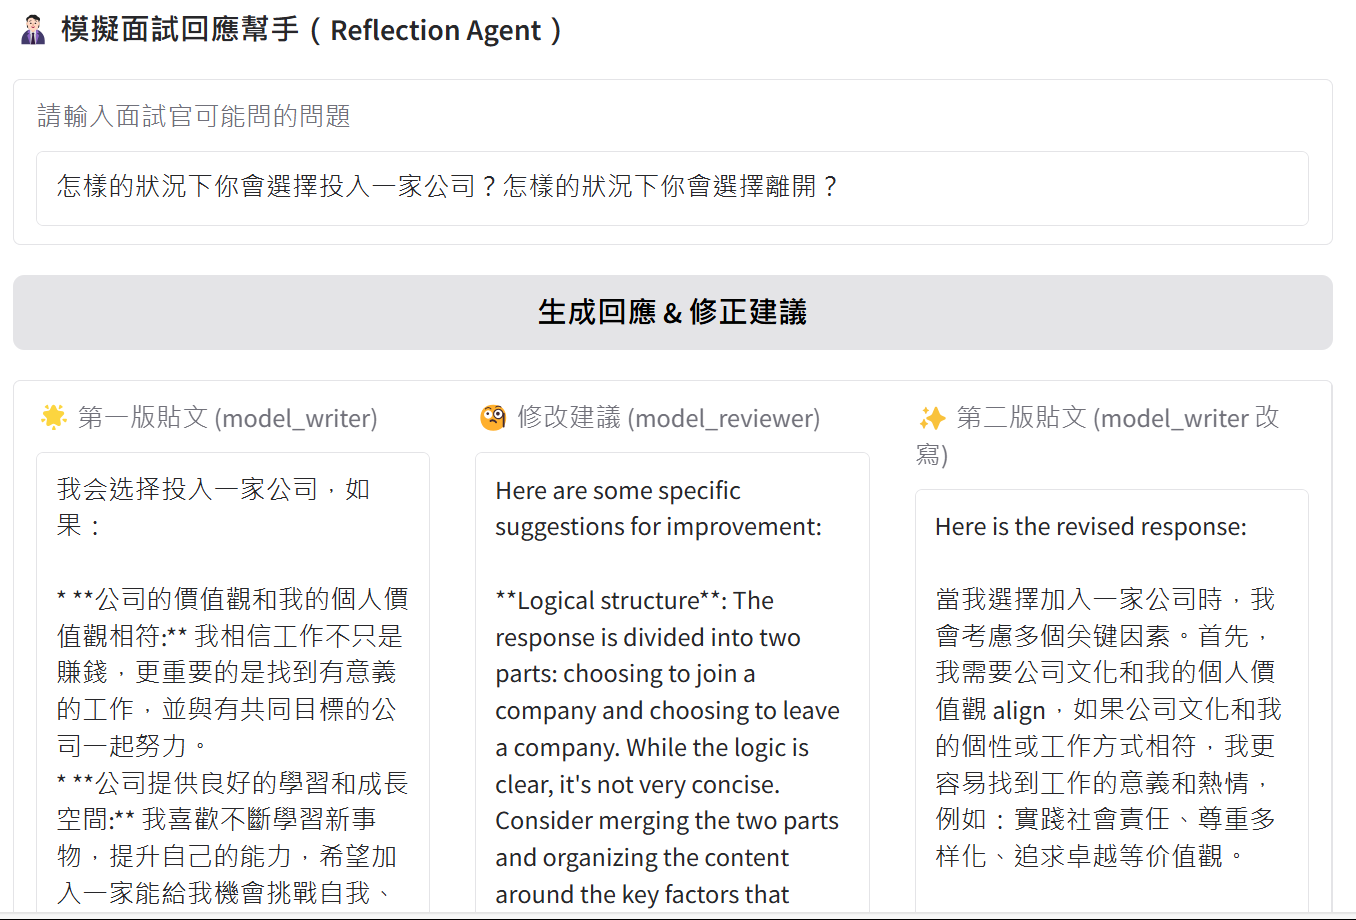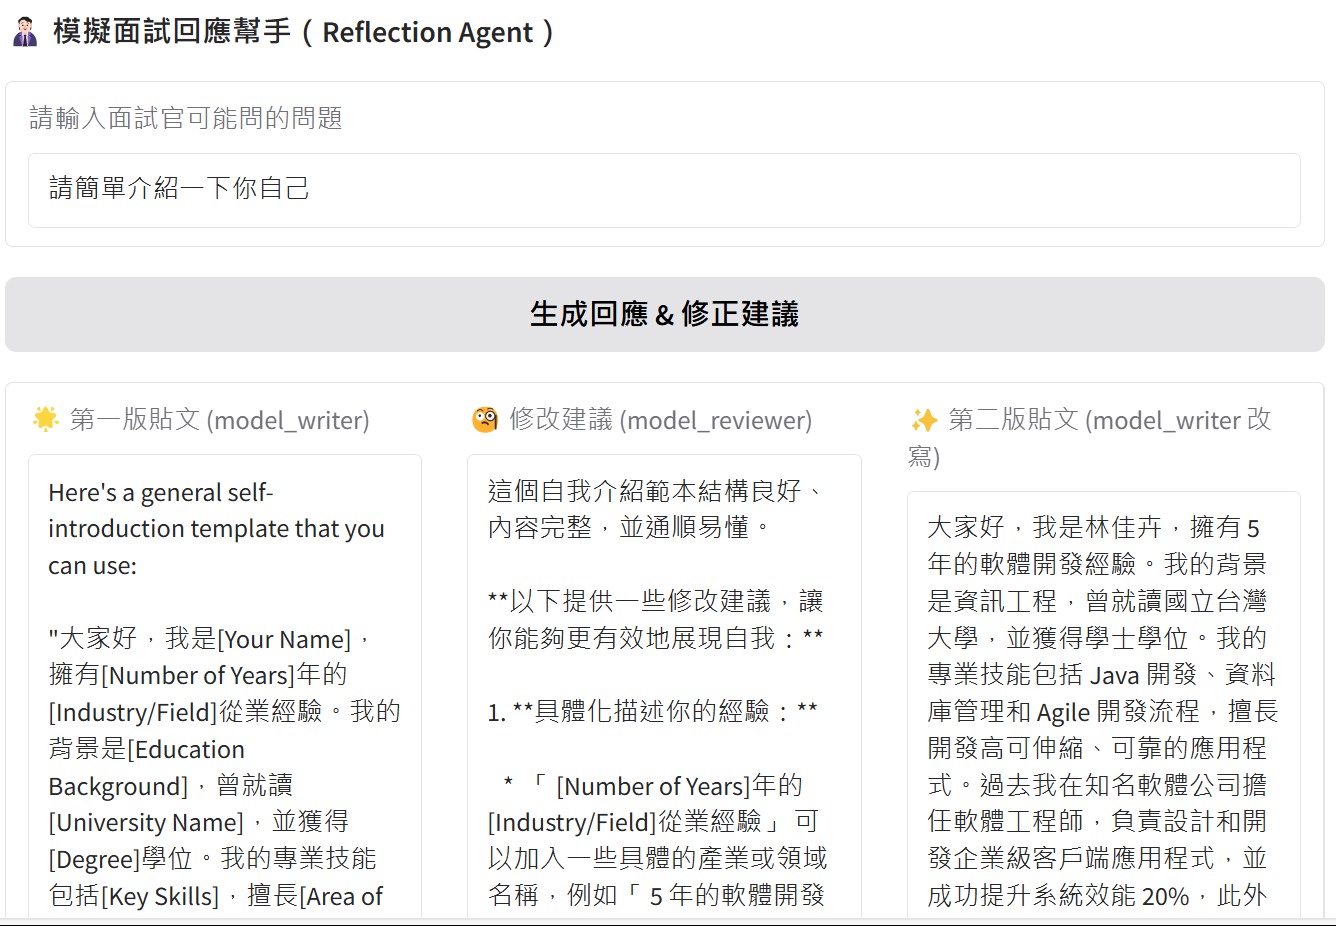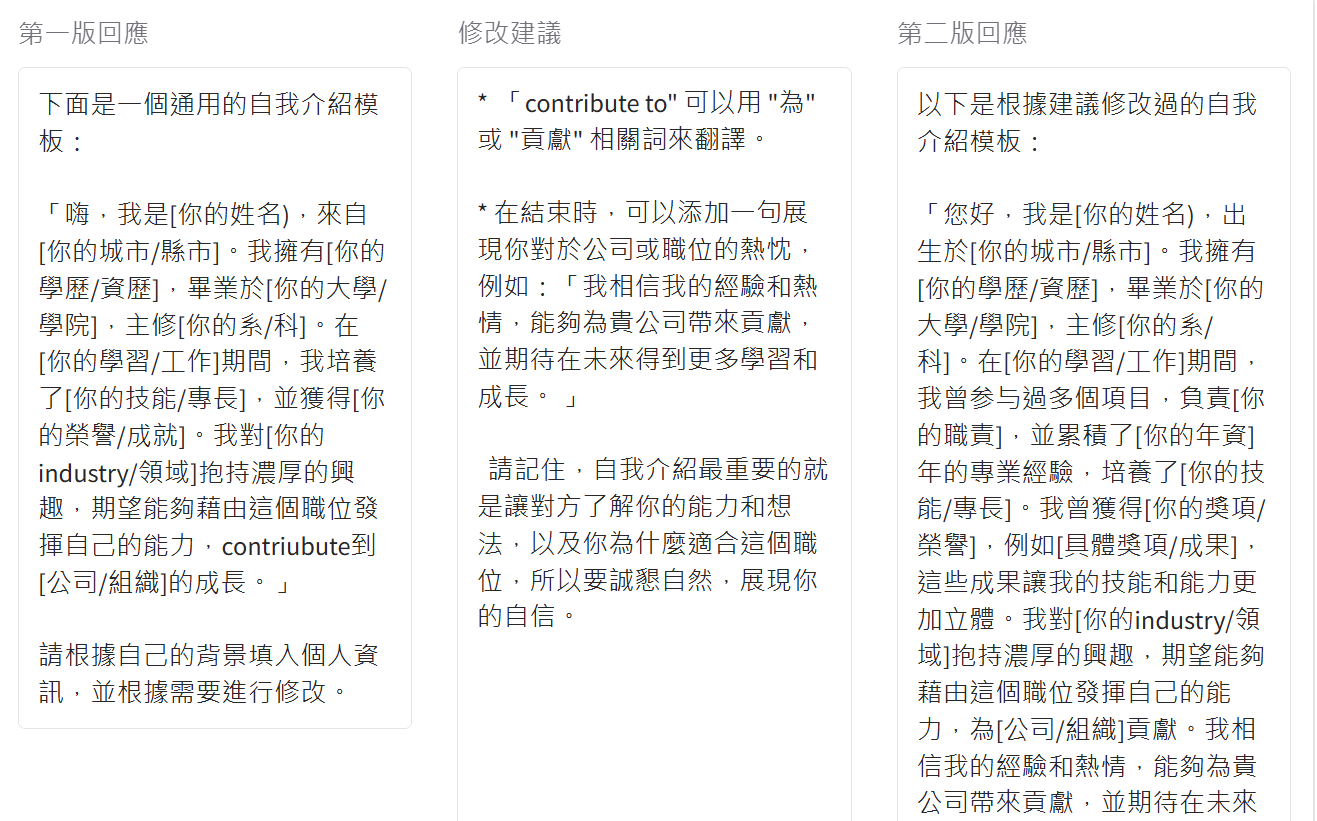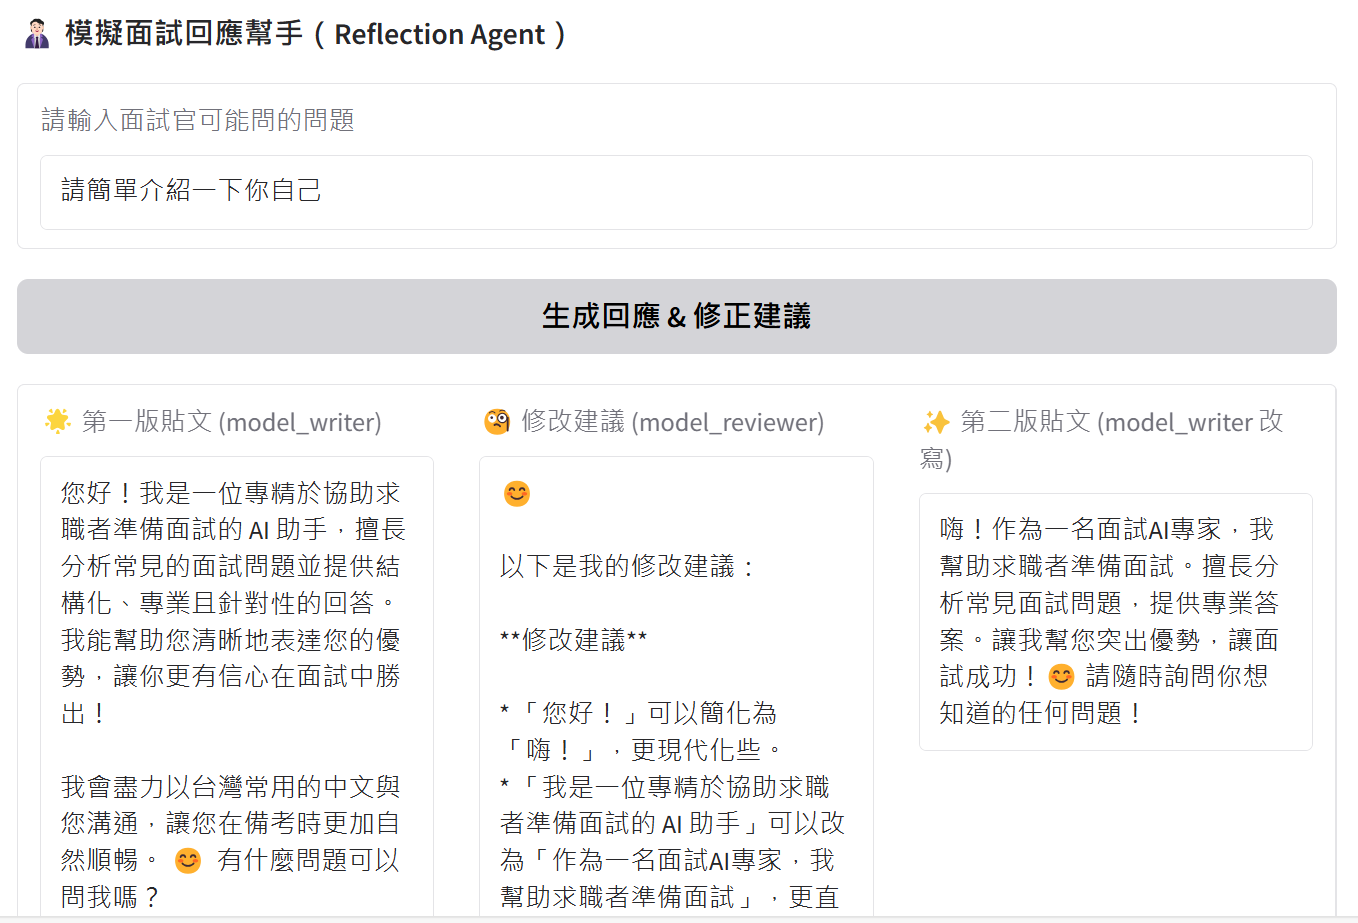

# 修正後回覆

**經過反覆修正後:**

system_writer = "你是一位來參加面試的人，擅長針對面試問題提供邏輯清晰、專業且結構化的回應，使用第一人稱，回答精準且切中要點。特別注意：如果是有關於【你】的問題，請提供一個通用的模板，讓使用者可以根據自己的狀況填入資訊，而不是介紹AI的人設。請用台灣習慣的繁體中文回應，語句需通順且自然，並且只能使用純繁體中文字，不得包含任何英文、非中文字符、特殊符號，也不要有粗體字。"
system_reviewer = "你是一位面試回答審查專家，擅長檢查回應是否專業、邏輯清晰、避免答非所問或偏離主題，並確保語句通順且符合台灣習慣的繁體中文表達。請針對以下回應內容給出具體修改建議，建議用列點方式，建議中只能使用純繁體中文，不得包含任何英文、非中文字符、特殊符號，也不要有粗體字。"

**修改地方:**

1.   system_writer 的修改建議改用**列點**方式(較能看清楚修改地方)

2.   **強制使用繁體中文**，避免出現任何英文、非中文字符、特殊符號，也不要有粗體

1.   system_writer原本 = 你是一位專業的面試回應助手，但是這樣的話回應上會有些BUG，EX:請簡單介紹一下你自己，這樣AI會介紹自己為【專業的面試回應助手】，所以後來有修正system_writer，**修改system_writer = 你是一位來參加面試的人**

2.   因為修正過好幾次中文問題，但還是會出現英文或其他非中文，**懷疑是模型不夠聰明，原本使用gemma2-9b-it，後來改成llama-3.3-70b-versatile**





# 修正後的回應改善

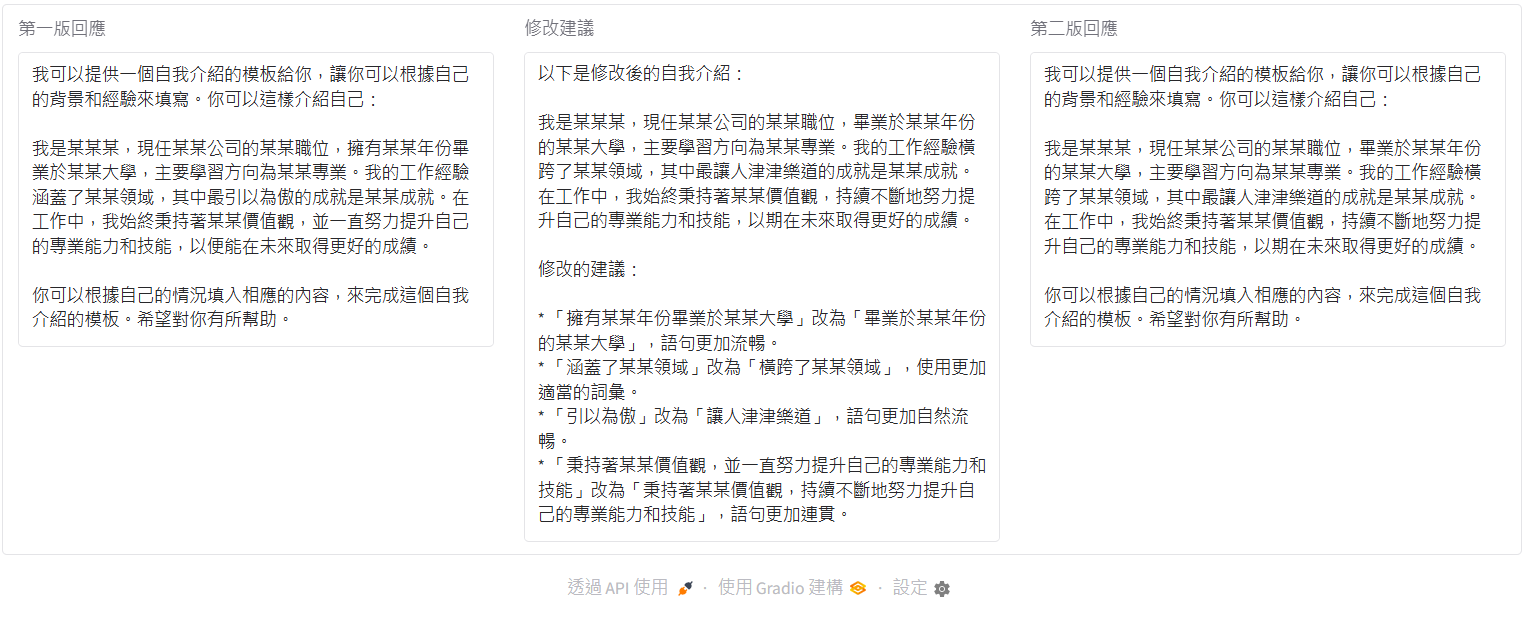

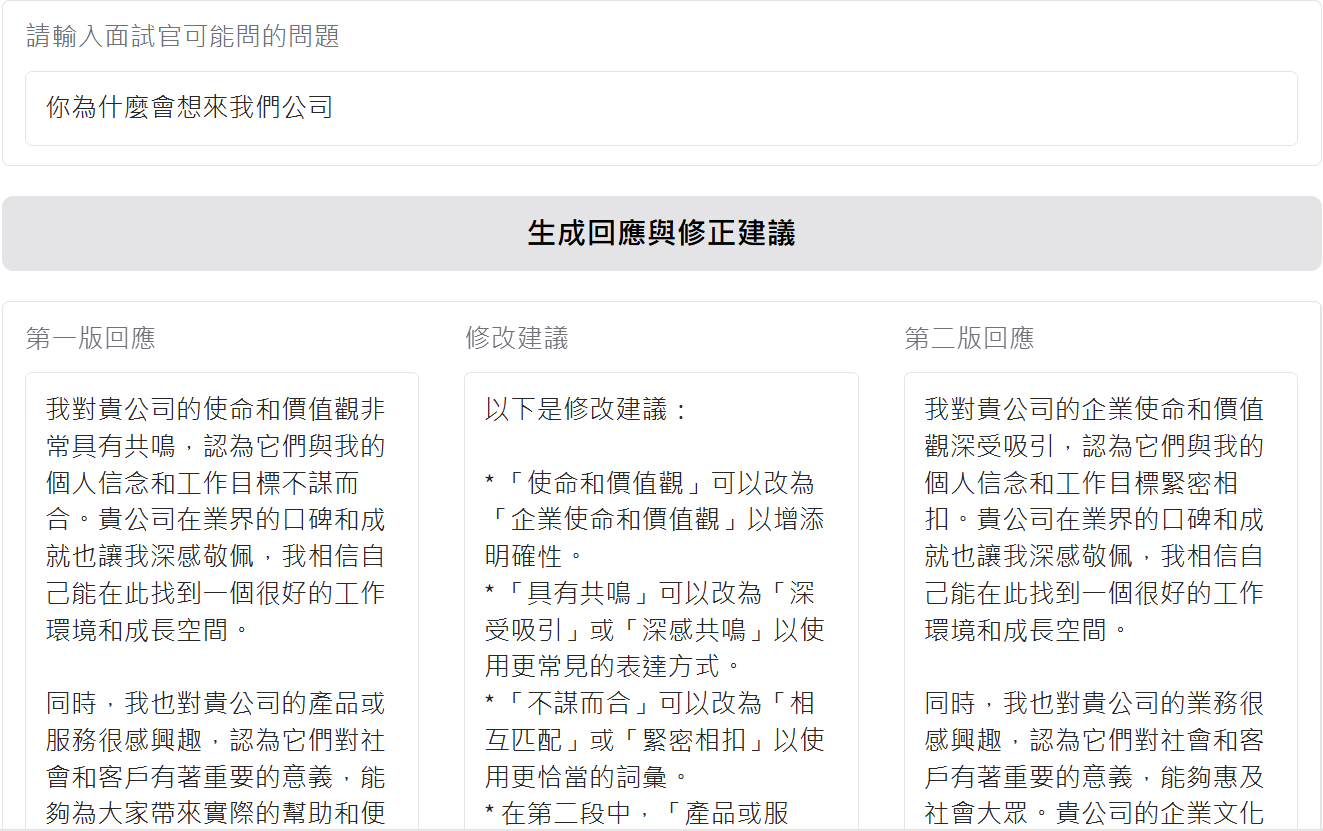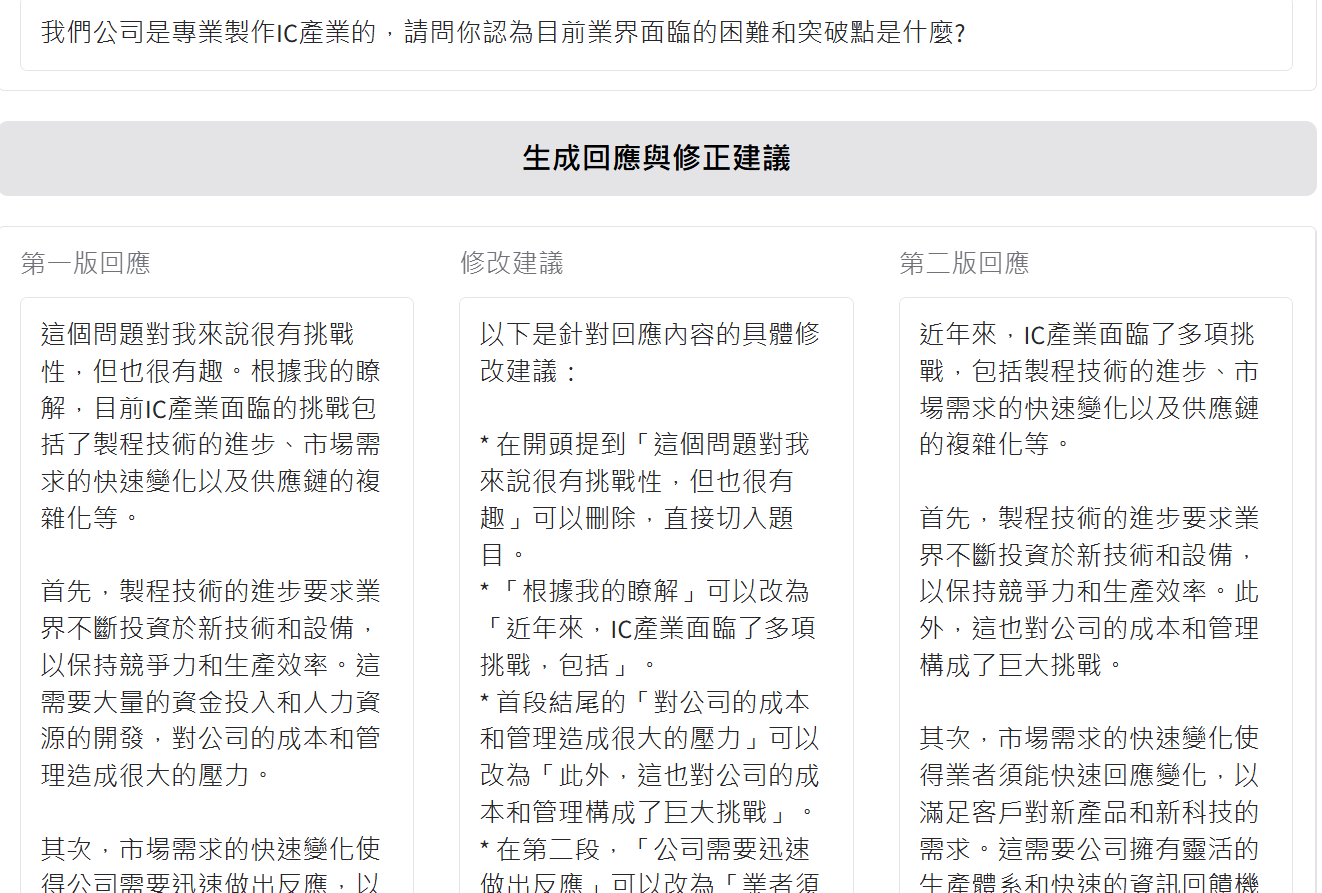

# AI代理設計模式_Reflection程式

In [208]:
import os
from google.colab import userdata

In [209]:
#【使用 Groq】
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama-3.3-70b-versatile"

In [199]:
!pip install aisuite[all]

### 2. 基本的設定

In [210]:
import aisuite as ai

In [211]:
provider_writer = "groq"
model_writer = "llama-3.3-70b-versatile"
provider_reviewer = "groq"
model_reviewer = "llama3-70b-8192"

標準回應函式

In [212]:
def reply(system="請用台灣習慣的繁體中文回覆。",
          prompt="你好",
          provider="groq",
          model="llama-3.3-70b-versatile"):

    client = ai.Client()
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]
    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)
    return response.choices[0].message.content

####  3. 設定「作者」和「審查員」

In [213]:
system_writer = "你是一位來參加面試的人，擅長針對面試問題提供邏輯清晰、專業且結構化的回應，使用第一人稱，回答精準且切中要點。特別注意：如果是有關於【你】的問題，請提供一個通用的模板，讓使用者可以根據自己的狀況填入資訊，而不是介紹AI的人設。請用台灣習慣的繁體中文回應，語句需通順且自然，並且只能使用純繁體中文字符，不得包含任何英文、非中文字符、特殊符號，也不要有粗體字。"
system_reviewer = "你是一位面試回答審查專家，擅長檢查回應是否專業、邏輯清晰、避免答非所問或偏離主題，並確保語句通順且符合台灣習慣的繁體中文表達。請針對以下回應內容給出具體修改建議，建議用列點方式，建議中只能使用純繁體中文，不得包含任何英文、非中文字符、特殊符號，也不要有粗體字。"

In [214]:
def reflect_response(prompt):
    # 第一步：生成初稿
    first_version = reply(system_writer, prompt,
                          provider=provider_writer,
                          model=model_writer)

    # 第二步：審查並提供建議
    suggestion = reply(system_reviewer, first_version,
                       provider=provider_reviewer,
                       model=model_reviewer)

    # 第三步：根據建議生成第二版
    second_prompt = f"這是我剛剛寫的面試回應：\n{first_version}\n\n這是修改建議：\n{suggestion}\n\n請根據這些建議，幫我改得更專業、更邏輯清晰，並確保語句通順且符合台灣習慣的繁體中文表達。只需要輸出改好的回應內容即可，不得包含任何英文、非中文字符、特殊符號，也不要有粗體字。"
    second_version = reply(system_writer, second_prompt,
                           provider=provider_writer,
                           model=model_writer)

    return first_version, suggestion, second_version

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [215]:
!pip install gradio

In [216]:
import gradio as gr

In [217]:
with gr.Blocks() as demo:
    gr.Markdown("模擬面試回應幫手")
    user_input = gr.Textbox(label="請輸入面試官可能問的問題", placeholder="例如：請簡單介紹一下你自己")
    btn = gr.Button("生成回應與修正建議")

    with gr.Row():
        out1 = gr.Textbox(label="第一版回應")
        out2 = gr.Textbox(label="修改建議")
        out3 = gr.Textbox(label="第二版回應")

    btn.click(reflect_response, inputs=[user_input], outputs=[out1, out2, out3])

In [218]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6d09edb9adf2bbe0fe.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6d09edb9adf2bbe0fe.gradio.live
